In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import unicodedata
from tqdm import tqdm
from bs4 import BeautifulSoup

/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_2202/1489069299.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
correct_answers = pd.DataFrame(columns=['question', 'answer'])
correct_answers['question'] = [
    'Timestamp',
    'Email Address',
    'Are you answering this survey before or after viewing the provided website? ',
    'Please enter your major(s) and minor(s) below: ',
    'How would you rate your understanding of language endangerment?',
    'What is your native language?List multiple, if applicable. \n\nNote: A native language is one you are exposed to from birth (or early childhood) during what linguists refer to as the critical period, which ends roughly at the beginning of puberty. ',
    'Are you an international student?',
    'How many languages do you think are presently spoken in the world?',
    'How many endangered or extinct languages do you think are in the world?',
    "Which of the following labels can be used to describe a language's status?",
    'Do you believe there are over 100 endangered languages in the United States?',
    'If you answered yes to the previous question, what region of the United States would you expect endangered languages to be most prominent?',
    'Do you think that any region in the world has a high concentration of endangered or extinct languages? If so, why? ',
    "If you've noticed any improvements to my website you think I should make, please feel free to list them below: "
]
correct_answers['answer'] = [
    None,
    None,
    ['Before', 'After'],
    None,
    ['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good'],
    None,
    ['Yes', 'No'],
    'between 5,000 - 10,000 languages',
    'between 1,000 - 5,000 languages',
    ['Endangered', 'Vulnerable', 'Definitely Endangered', 'Severely Endangered', 'Critically Endangered', 'Extinct'],
    'Yes',
    ['The Rocky Mountains', 'Southwest', 'West Coast'],
    None,
    None
]


# correct_answers

In [4]:
impact_data = pd.read_csv('../csv_files/Language Status Visualization Impact Survey Responses.csv')
# impact_data

In [8]:
quantitative_columns = [
    'How would you rate your understanding of language endangerment?',
    'Are you an international student?',
    'How many languages do you think are presently spoken in the world?',
    'How many endangered or extinct languages do you think are in the world?',
    "Which of the following labels can be used to describe a language's status?",
    'Do you believe there are over 100 endangered languages in the United States?',
    'If you answered yes to the previous question, what region of the United States would you expect endangered languages to be most prominent?',
]

# fig, axs = plt.subplots(1, 2, figsize=(20, 20))

before_responses = impact_data[impact_data['Are you answering this survey before or after viewing the provided website? '] == 'Before']
after_responses = impact_data[impact_data['Are you answering this survey before or after viewing the provided website? '] == 'After']

/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_2202/2957805007.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a2 = a.replace(value_mapping)
/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_2202/2957805007.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  b2 = b.replace(value_mapping)
/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_2202/2957805007.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_y

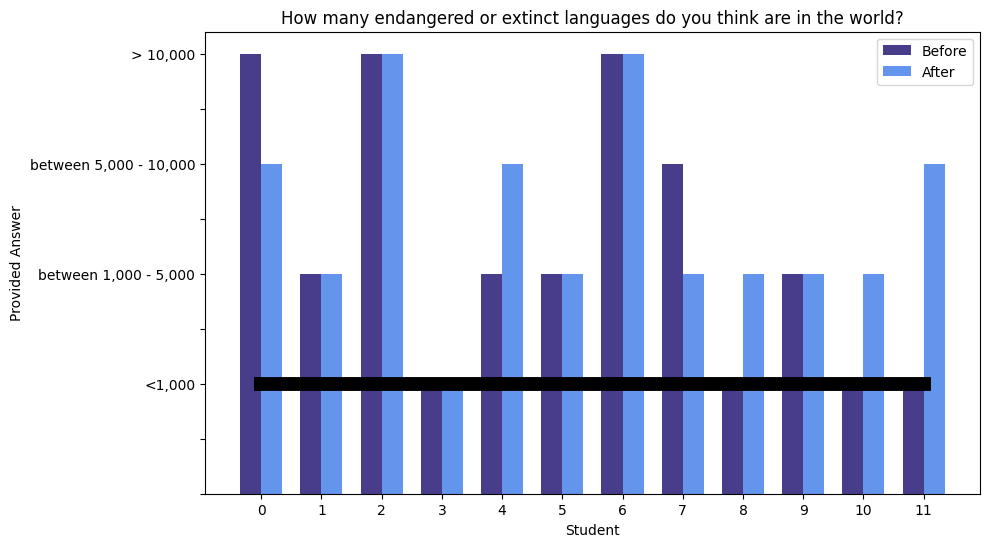

In [9]:
value_mapping = { '< 1,000 languages': 1, \
                 'between 1,000 - 5,000 languages': 2, \
                    'between 5,000 - 10,000 languages': 3, \
                    '> 10,000 languages': 4 }

a= before_responses['How many endangered or extinct languages do you think are in the world?']
b= after_responses['How many endangered or extinct languages do you think are in the world?']

a.index = range(len(a))
b.index = range(len(b))

a2 = a.replace(value_mapping)
b2 = b.replace(value_mapping)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions
x = np.arange(len(a2))

# Define the width of each bar
width = 0.35

# Plot the bars for 'a'
ax.bar(x - width/2, a2, width, label='Before', color='darkslateblue')

# Plot the bars for 'b'
ax.bar(x + width/2, b2, width, label='After', color='cornflowerblue')

# Add labels, title, and legend
ax.set_xlabel('Student')
# ax.set_yticks(ticks = [1, 2, 3, 4], labels = ['<1,000', 'between 1,000 - 5,000', 'between 5,000 - 10,000', '> 10,000'])

# ax.set_yticks([1, 2, 3, 4]) #my line: will move ticks up but doesn't change order or limits
ax.set_yticklabels(['', '', '<1,000', '', 'between 1,000 - 5,000', '', 'between 5,000 - 10,000', '', '> 10,000']) #my line
ax.set_ylabel('Provided Answer')
ax.set_title('How many endangered or extinct languages do you think are in the world?')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

#make horizontal line at y=1
plt.plot(range(0, 12), [1]*12, color='black', linewidth=10)

# Show the plot
plt.show()
# plt.hist(b, bins=10, alpha=0.5, label='After', ax=axs[1])

/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_2202/3515359141.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a2 = a.replace(value_mapping)
/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_2202/3515359141.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  b2 = b.replace(value_mapping)
/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_2202/3515359141.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_y

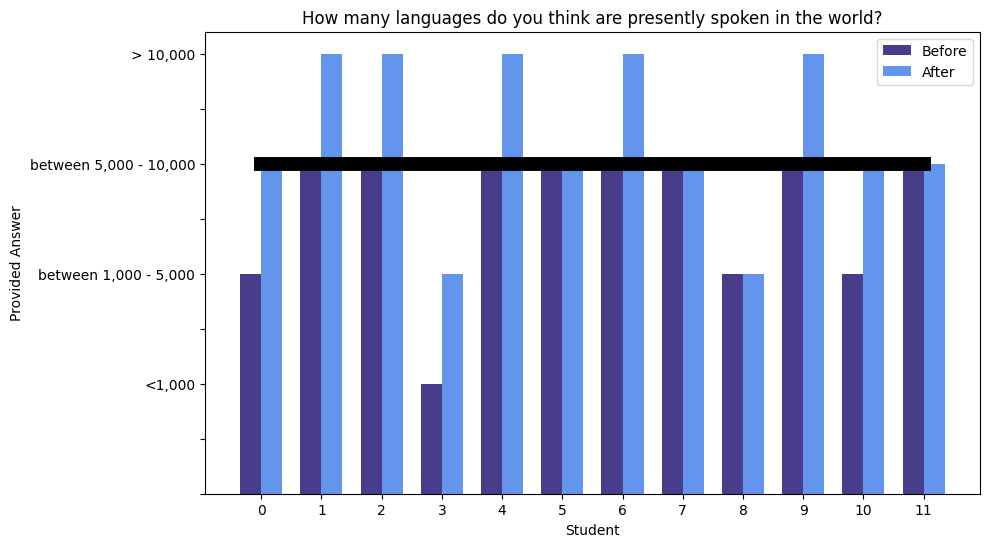

In [10]:
value_mapping = { '< 1,000 languages': 1, \
                 'between 1,000 - 5,000 languages': 2, \
                    'between 5,000 - 10,000 languages': 3, \
                    '> 10,000 languages': 4 }

a= before_responses['How many languages do you think are presently spoken in the world?']
b= after_responses['How many languages do you think are presently spoken in the world?']

a.index = range(len(a))
b.index = range(len(b))

a2 = a.replace(value_mapping)
b2 = b.replace(value_mapping)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions
x = np.arange(len(a2))

# Define the width of each bar
width = 0.35

# Plot the bars for 'a'
ax.bar(x - width/2, a2, width, label='Before', color='darkslateblue')

# Plot the bars for 'b'
ax.bar(x + width/2, b2, width, label='After', color='cornflowerblue')

# Add labels, title, and legend
ax.set_xlabel('Student')
# ax.set_yticks(ticks = [1, 2, 3, 4], labels = ['<1,000', 'between 1,000 - 5,000', 'between 5,000 - 10,000', '> 10,000'])

# ax.set_yticks([1, 2, 3, 4]) #my line: will move ticks up but doesn't change order or limits
ax.set_yticklabels(['', '', '<1,000', '', 'between 1,000 - 5,000', '', 'between 5,000 - 10,000', '', '> 10,000']) #my line
ax.set_ylabel('Provided Answer')
ax.set_title('How many languages do you think are presently spoken in the world?')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

#make horizontal line at y=1
plt.plot(range(0, 12), [3]*12, color='black', linewidth=10)

# Show the plot
plt.show()
# plt.hist(b, bins=10, alpha=0.5, label='After', ax=axs[1])

In [11]:
['Not Endangered', 'Shifting', 'Threatened', 'Nearly Extinct', 'Moribund', 'Extinct']

['Not Endangered',
 'Shifting',
 'Threatened',
 'Nearly Extinct',
 'Moribund',
 'Extinct']

In [12]:
br = before_responses['Which of the following labels can be used to describe a language\'s status?'].values.tolist()
ar = after_responses['Which of the following labels can be used to describe a language\'s status?'].values.tolist()

bar = set(br + ar)
bar

{'Extinct',
 'Safe, Definitely Endangered, Severely Endangered, Critically Endangered, Extinct',
 'Safe, Vulnerable, Critically Endangered, Extinct',
 'Safe, Vulnerable, Definitely Endangered, Critically Endangered, Extinct',
 'Safe, Vulnerable, Definitely Endangered, Severely Endangered, Critically Endangered, Extinct',
 'Safe, Vulnerable, Severely Endangered, Extinct',
 'Vulnerable, Definitely Endangered, Severely Endangered, Critically Endangered, Extinct',
 'Vulnerable, Severely Endangered, Critically Endangered, Extinct'}

In [13]:
value_mapping = {'Extinct': 1, \
                    'Not Endangered, Shifting, Nearly Extinct, Extinct': 2, \
                    'Not Endangered, Shifting, Moribund, Extinct': 3, \
                    'Shifting, Nearly Extinct, Moribund, Extinct': 4, \
                    'Not Endangered, Shifting, Threatened, Moribund, Extinct': 5, \
                    'Not Endangered, Threatened, Nearly Extinct, Moribund, Extinct': 6, \
                    'Shifting, Threatened, Nearly Extinct, Moribund, Extinct': 7, \
                    'Not Endangered, Shifting, Threatened, Nearly Extinct, Moribund, Extinct': 8}

/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_2202/4266307797.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Extinct', 'Not Endangered, Shifting, Nearly Extinct, Extinct', 'Not Endangered, Shifting, Moribund, Extinct', 'Shifting, Nearly Extinct, Moribund, Extinct', 'Not Endangered, Shifting, Threatened, Moribund, Extinct', 'Not Endangered, Threatened, Nearly Extinct, Moribund, Extinct', 'Shifting, Threatened, Nearly Extinct, Moribund, Extinct', 'Not Endangered, Shifting, Threatened, Nearly Extinct, Moribund, Extinct' ])


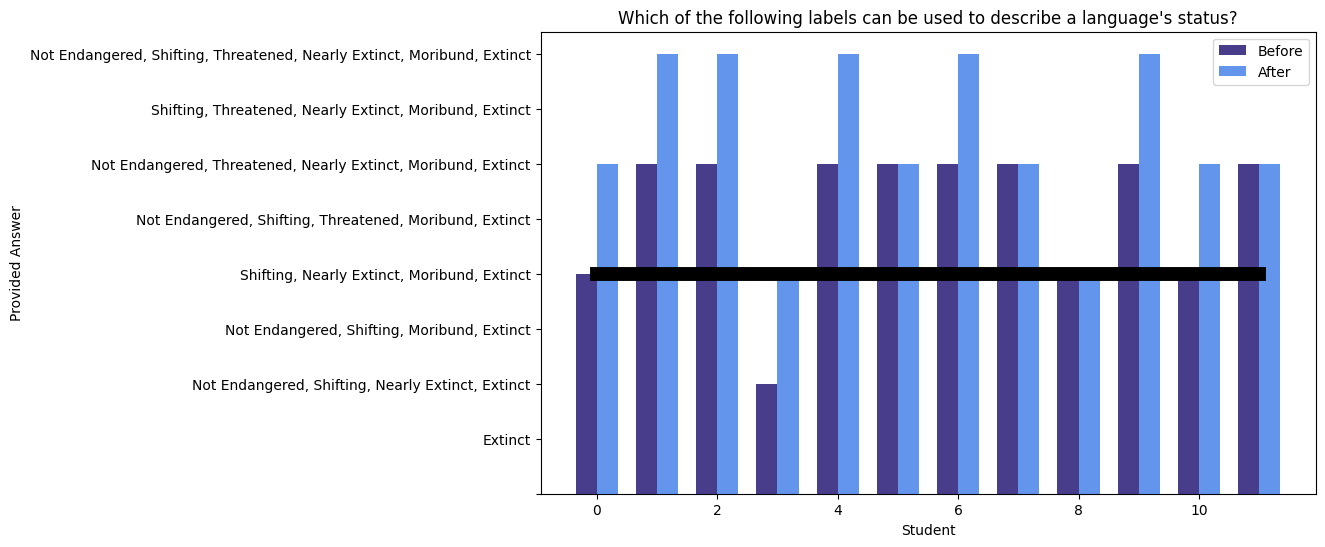

In [15]:
value_mapping = {'Extinct': 1, \
                    'Not Endangered, Shifting, Nearly Extinct, Extinct': 2, \
                    'Not Endangered, Shifting, Moribund, Extinct': 3, \
                    'Shifting, Nearly Extinct, Moribund, Extinct': 4, \
                    'Not Endangered, Shifting, Threatened, Moribund, Extinct': 5, \
                    'Not Endangered, Threatened, Nearly Extinct, Moribund, Extinct': 6, \
                    'Shifting, Threatened, Nearly Extinct, Moribund, Extinct': 7, \
                    'Not Endangered, Shifting, Threatened, Nearly Extinct, Moribund, Extinct': 8}

a= before_responses['Which of the following labels can be used to describe a language\'s status?']
# plt.hist(a, bins=10, alpha=0.5, label='Before', ax=axs[0])
b= after_responses['Which of the following labels can be used to describe a language\'s status?']

a.index = range(len(a))
b.index = range(len(b))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions
x = np.arange(len(a2))

# Define the width of each bar
width = 0.35

# Plot the bars for 'a'
ax.bar(x - width/2, a2, width, label='Before', color='darkslateblue')

# Plot the bars for 'b'
ax.bar(x + width/2, b2, width, label='After', color='cornflowerblue')

# Add labels, title, and legend
ax.set_yticklabels(['', 'Extinct', 'Not Endangered, Shifting, Nearly Extinct, Extinct', 'Not Endangered, Shifting, Moribund, Extinct', 'Shifting, Nearly Extinct, Moribund, Extinct', 'Not Endangered, Shifting, Threatened, Moribund, Extinct', 'Not Endangered, Threatened, Nearly Extinct, Moribund, Extinct', 'Shifting, Threatened, Nearly Extinct, Moribund, Extinct', 'Not Endangered, Shifting, Threatened, Nearly Extinct, Moribund, Extinct' ])
ax.set_xlabel('Student')
ax.set_ylabel('Provided Answer')
ax.set_title('Which of the following labels can be used to describe a language\'s status?')
# ax.set_xticks(x)
# ax.set_xticklabels(x)
ax.legend()

#make horizontal line at y=1

plt.plot(range(0, 12), [2]*12, color='black', linewidth=10)

# Show the plot
plt.show()
# plt.hist(b, bins=10, alpha=0.5, label='After', ax=axs[1])

/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_1509/780670013.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a2 = a.replace(value_mapping)
/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_1509/780670013.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  b2 = b.replace(value_mapping)
/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_1509/780670013.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_ytickl

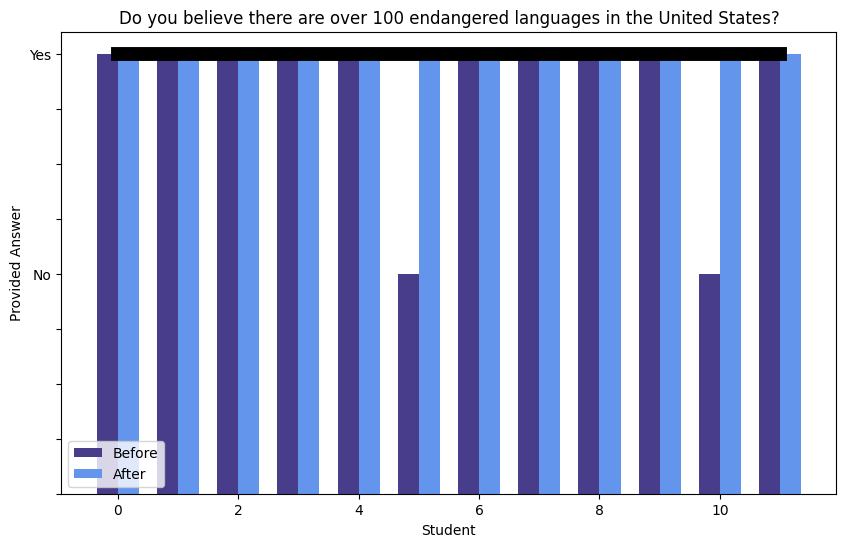

In [10]:
value_mapping = {'Yes': 2, 'No': 1, '': 0}

a= before_responses['Do you believe there are over 100 endangered languages in the United States?']
b= after_responses['Do you believe there are over 100 endangered languages in the United States?']

a2 = a.replace(value_mapping)
b2 = b.replace(value_mapping)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions
x = np.arange(len(a2))

# Define the width of each bar
width = 0.35

# Plot the bars for 'a'
ax.bar(x - width/2, a2, width, label='Before', color='darkslateblue')

# Plot the bars for 'b'
ax.bar(x + width/2, b2, width, label='After', color='cornflowerblue')


ax.set_xlabel('Student')
ax.set_yticklabels(['', '', '', '', 'No', '', '', '', 'Yes']) #my line
ax.set_ylabel('Provided Answer')
ax.set_title('Do you believe there are over 100 endangered languages in the United States?')
ax.legend()

plt.plot(range(0, 12), [2]*12, color='black', linewidth=10)

# Show the plot
plt.show()

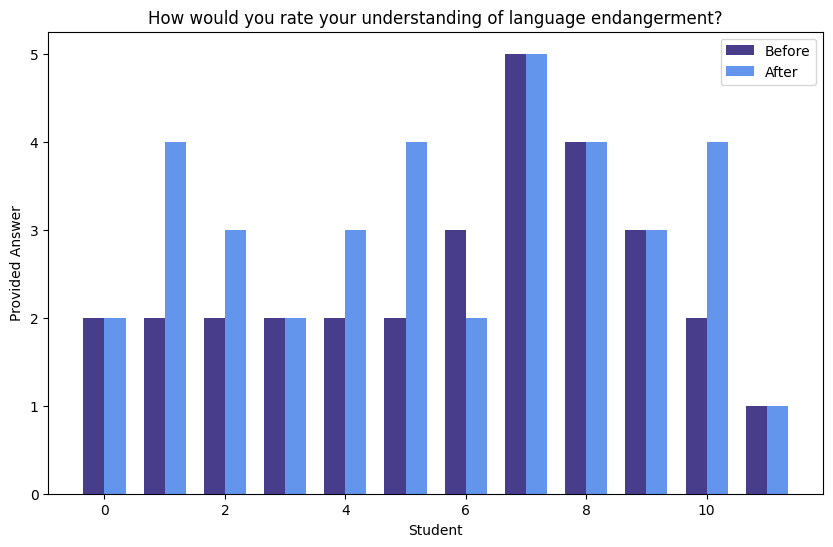

In [16]:
value_mapping = {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}

a= before_responses['How would you rate your understanding of language endangerment?']
b= after_responses['How would you rate your understanding of language endangerment?']

a2 = a.replace(value_mapping)
b2 = b.replace(value_mapping)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions
x = np.arange(len(a2))

# Define the width of each bar
width = 0.35

# Plot the bars for 'a'
ax.bar(x - width/2, a2, width, label='Before', color='darkslateblue')

# Plot the bars for 'b'
ax.bar(x + width/2, b2, width, label='After', color='cornflowerblue')


ax.set_xlabel('Student')
# ax.set_yticklabels(['', '', '', '', 'No', '', '', '', 'Yes']) #my line
ax.set_ylabel('Provided Answer')
ax.set_title('How would you rate your understanding of language endangerment?')
ax.legend()

# Show the plot
plt.show()

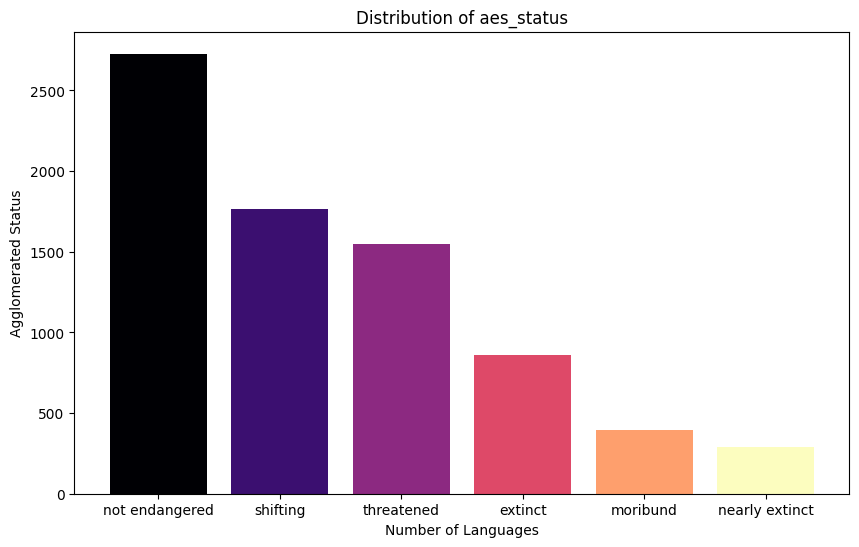

In [98]:
glotto_data = pd.read_csv('glottolog_data.csv')

# plot the distribution of aes_status 
fig, ax = plt.subplots(figsize=(10, 6))
my_cmap = plt.get_cmap("magma")
plt.bar(glotto_data['aes_status'].value_counts().index, glotto_data['aes_status'].value_counts().values, color=my_cmap(np.linspace(0, 1, 6)))
ax.set_title('Distribution of aes_status')
ax.set_ylabel('Agglomerated Status')
ax.set_xlabel('Number of Languages')
plt.show()
